## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice = merge_df["Mouse ID"].nunique()
mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup = merge_df[merge_df[['Mouse ID','Timepoint']].duplicated() == True]
dup[["Mouse ID", "Timepoint"]]

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup = merge_df[merge_df[['Mouse ID', 'Timepoint']].duplicated() == True]
dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df2 = merge_df.drop_duplicates(["Mouse ID", "Timepoint"])


In [6]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()


249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
df3 = df2.groupby(['Drug Regimen'])
avg_totals = df3['Tumor Volume (mm3)'].mean()
med_totals = df3['Tumor Volume (mm3)'].median()
std_totals = df3['Tumor Volume (mm3)'].std()
var_totals = df3['Tumor Volume (mm3)'].var()
sem_totals = df3['Tumor Volume (mm3)'].sem()

sum_stat_df = pd.DataFrame({"Mean": avg_totals,
                            "Median": med_totals,
                            "Variance": var_totals,
                            "Standard Devation": std_totals,
                            "SEM": sem_totals})
sum_stat_df



,Mean,Median,Variance,Standard Devation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

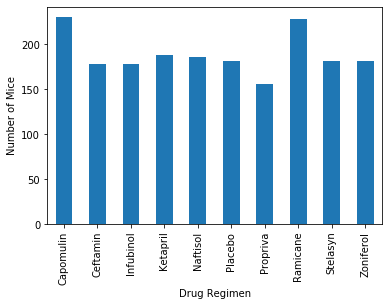

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Create a bar chart based off of the group series from before
df4 = df2.groupby(['Drug Regimen'])
drug_totals = df4['Mouse ID'].count()

treatment_chart = drug_totals.plot(kind='bar')

treatment_chart.set_xlabel("Drug Regimen")
treatment_chart.set_ylabel("Number of Mice")

plt.show()
plt.tight_layout()


In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

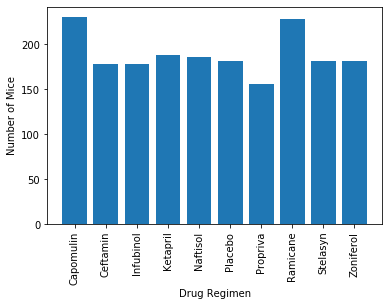

In [11]:
drug_totals2= pd.Series(drug_totals).to_frame('Mice')
drug_totals3 = drug_totals2.reset_index()

x = drug_totals3["Drug Regimen"]
data = drug_totals3["Mice"]
plt.bar(x, data) 
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice");

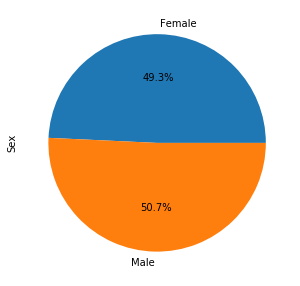

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df5 = df2.groupby(['Sex'])
mouse = df5['Sex'].count()
plot = mouse.plot.pie(y='mass', figsize=(5, 5), autopct = '%1.1f%%')

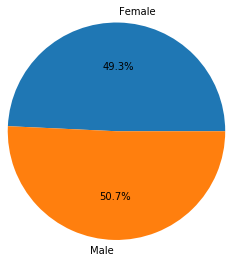

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
drug_totals_sex= pd.Series(mouse).to_frame('mouse')
drug_totals_sex2 = drug_totals_sex.reset_index()

x = drug_totals_sex2["Sex"]
data = drug_totals_sex2["mouse"]
plt.pie(data, labels=x, radius = 1.25,autopct="%1.1f%%");


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
#filter & .loc
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


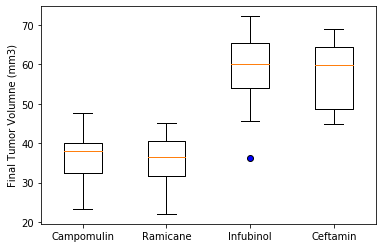

The lower quartile of Campomulin is: 32.37735684
The upper quartile of Campomulin is: 40.1592203
The interquartile range of Campomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers for Campomulin.
Values above 51.83201549 could be outliers for Campomulin.
------------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.
------------------------------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers for Infubinol.
------------------------------------------------
The lower quart

In [15]:

df6 = df2.sort_values(['Mouse ID', 'Timepoint'])
df10 = df6.drop_duplicates(['Mouse ID'],keep='last')
df10.set_index('Drug Regimen', inplace=True)
df11 = df10.drop(['Mouse ID', 'Sex' ,'Age_months', 'Weight (g)','Metastatic Sites'], axis = 1)


campomulin = df11.loc['Capomulin']
ramicane = df11.loc['Ramicane']
infubinol = df11.loc['Infubinol']
ceftamin = df11.loc['Ceftamin']

campomulin.columns = "Timepoint", "Tumor"
ramicane.columns = "Timepoint", "Tumor"
infubinol.columns = "Timepoint", "Tumor"
ceftamin.columns = "Timepoint", "Tumor"

filerprops = dict(marker = 'o', markerfacecolor = 'blue')
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volumne (mm3)')
ax1.boxplot([campomulin.Tumor, ramicane.Tumor, infubinol.Tumor, ceftamin.Tumor], flierprops = filerprops)
plt.xticks([1, 2, 3, 4], ['Campomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

quartiles = campomulin.Tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Campomulin is: {lowerq}")
print(f"The upper quartile of Campomulin is: {upperq}")
print(f"The interquartile range of Campomulin is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Campomulin.")
print(f"Values above {upper_bound} could be outliers for Campomulin.")
print("------------------------------------------------")

quartiles = ramicane.Tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Ramicane.")
print(f"Values above {upper_bound} could be outliers for Ramicane.")
print("------------------------------------------------")    
    
quartiles = infubinol.Tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Infubinol.")
print(f"Values above {upper_bound} could be outliers for Infubinol.")
print("------------------------------------------------")    
        
quartiles = ceftamin.Tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Ceftamin.")
print(f"Values above {upper_bound} could be outliers for Ceftamin.")


## Line and Scatter Plots

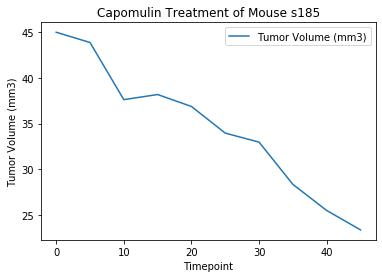

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
lsp = df2
lsp2 = lsp.drop(['Sex', 'Age_months','Weight (g)', 'Metastatic Sites'], axis = 1)
lsp3 = lsp2.loc[(lsp2['Drug Regimen'] == 'Capomulin') & (lsp2['Mouse ID'] == 's185')] 
lsp3.set_index('Timepoint', inplace=True)

lsp3.plot()
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185");

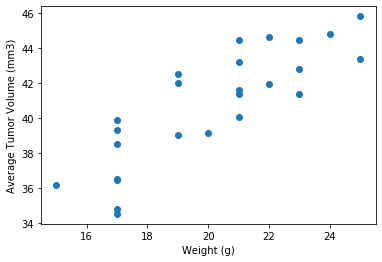

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
lsp = df2
lsp4 = lsp.drop(['Sex', 'Age_months', 'Timepoint', 'Metastatic Sites'], axis = 1)
lsp5 = lsp4.loc[(lsp2['Drug Regimen'] == 'Capomulin')] 
mouse_gb = lsp5.groupby(['Mouse ID'])
mouse_gb1 = mouse_gb.mean()

plt.scatter(x=mouse_gb1['Weight (g)'], y=mouse_gb1['Tumor Volume (mm3)'])
plt.show
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)");

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The correlation between mouse weight and the average tumor volume is 0.84


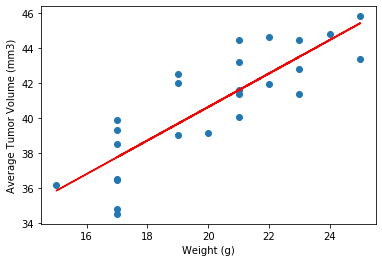

In [19]:
x=mouse_gb1['Weight (g)']
y=mouse_gb1['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show 

correlation = st.pearsonr(x,y)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

Observations:
    
-There was a well-balanced amount of Female and Male mice included in the study.

-Mouse s185 responded very well to Capomulin, with the tumor shrinking to at least 50% of what it was when the mouse started taking the drug.

-Generally, it seems like the heavier the mouse was, the larger the tumor volume was at the end of treatment on Capomulin. 
